In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats import diagnostic
from scipy import stats

#Display all columns
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

%matplotlib inline

Firstly, we decided to work with the data of each website separatly to explore them and determine what's gonna be intersting to work on. 

### RateBeer Website

In [3]:
#RateBeer website data :

df_beer = pd.read_csv("RateBeer/beers.csv", index_col='beer_id')
df_breweries  = pd.read_csv("RateBeer/breweries.csv")
df_users = pd.read_csv("RateBeer/users.csv")
df_review = pd.read_csv("RateBeer/reviews.txt", on_bad_lines='skip') #pas ouf

#### Data exploration on df_beer

In [4]:
df_beer

,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
beer_id,,,,,,,,,,,,,,
166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN
19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN
19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


First we explore the nbr_ratings per beer, the basic descriptive statistics, it's distribution and some visualization. 

In [5]:
df_beer['nbr_ratings'].isna().sum()

0

In [6]:
df_beer['nbr_ratings'].describe(),

(count    280823.000000
 mean         29.887267
 std         231.010063
 min           0.000000
 25%           1.000000
 50%           2.000000
 75%           8.000000
 max       16509.000000
 Name: nbr_ratings, dtype: float64,)

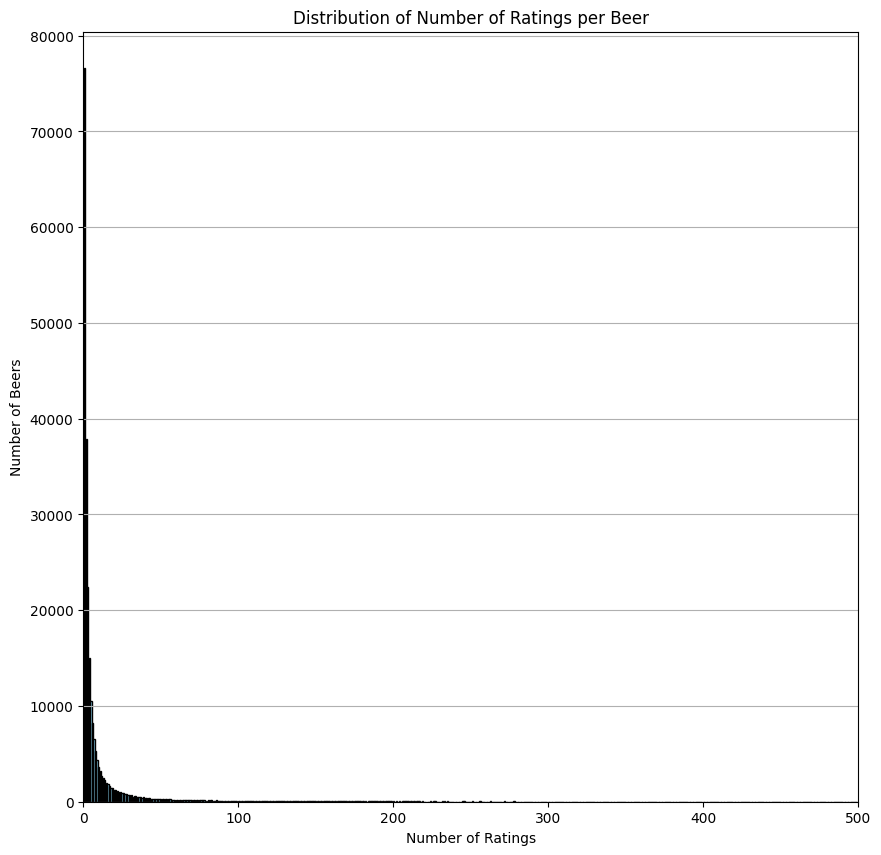

In [7]:
# Count the number of beers for each number of ratings
reviews_counts = df_beer['nbr_ratings'].value_counts().sort_index()

# Plot the distribution of number of ratings per beer
plt.figure(figsize=(10,10))
plt.bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Beers')
plt.title('Distribution of Number of Ratings per Beer')
plt.grid(axis='y')
plt.xlim(0, 500)
plt.show()


In [8]:
# Count the number of beers for each number of ratings
reviews_counts = df_beer['nbr_ratings'].value_counts().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: Original axis
axes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('Number of Beers')
axes[0].set_title('Distribution of Number of Ratings per Beer')
axes[0].grid(axis='y')


# Plot 2: Inverted axis
axes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of Beers')
axes[1].set_ylabel('Number of Ratings')
axes[1].set_title('Distribution of Number of Ratings per Beer (Inverted Axis)')
axes[1].grid(axis='x')


axes[1].set_ylim(0, 300) 
axes[0].set_xlim(0, 200) 

plt.tight_layout() 
plt.show()


"\n# Count the number of beers for each number of ratings\nreviews_counts = df_beer['nbr_ratings'].value_counts().sort_index()\n\n# Create a figure with two subplots\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))\n\n# Plot 1: Original axis\naxes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')\naxes[0].set_xlabel('Number of Ratings')\naxes[0].set_ylabel('Number of Beers')\naxes[0].set_title('Distribution of Number of Ratings per Beer')\naxes[0].grid(axis='y')\n\n\n# Plot 2: Inverted axis\naxes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')\naxes[1].set_xlabel('Number of Beers')\naxes[1].set_ylabel('Number of Ratings')\naxes[1].set_title('Distribution of Number of Ratings per Beer (Inverted Axis)')\naxes[1].grid(axis='x')\n\n\naxes[1].set_ylim(0, 300) \naxes[0].set_xlim(0, 200) \n\nplt.tight_layout() \nplt.show()\n"

In [9]:
# Get an idea of the distribution of the number of ratings per beer

# Choose different quantile thresholds 
ratings_threshold75 = df_beer['nbr_ratings'].quantile(0.75)
ratings_threshold90 = df_beer['nbr_ratings'].quantile(0.90)
ratings_threshold95 = df_beer['nbr_ratings'].quantile(0.95)
ratings_threshold98 = df_beer['nbr_ratings'].quantile(0.98)
ratings_threshold99 = df_beer['nbr_ratings'].quantile(0.99)

# Filter beers based on the threshold
filtered_beers75 = df_beer[df_beer['nbr_ratings'] >= ratings_threshold75]
filtered_beers90 = df_beer[df_beer['nbr_ratings'] >= ratings_threshold90]
filtered_beers95 = df_beer[df_beer['nbr_ratings'] >= ratings_threshold95]
filtered_beers98 = df_beer[df_beer['nbr_ratings'] >= ratings_threshold98]
filtered_beers99 = df_beer[df_beer['nbr_ratings'] >= ratings_threshold99]

print(filtered_beers75.shape,
filtered_beers90.shape,
filtered_beers95.shape,
filtered_beers98.shape,
filtered_beers99.shape)

(70860, 14) (28177, 14) (14086, 14) (5631, 14) (2814, 14)


Note: we see that even by taking the top 1% of most rated beers we still have 4428 beers. 

In [10]:
# Create a new DataFrame with beers in the 99th percentile
df_filtered_beer = filtered_beers99

# Display the new DataFrame
display(df_filtered_beer)

,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
beer_id,,,,,,,,,,,,,,
41037,Ola Dubh Special Reserve 12,323,Harviestoun Brewery Ltd.,Old Ale,834,383,4.13,92.0,NaN,8.0,4.114868,NaN,0,NaN
41012,Ola Dubh Special Reserve 16,323,Harviestoun Brewery Ltd.,Old Ale,628,297,4.12,91.0,NaN,8.0,4.126433,NaN,0,NaN
875,Old Engine Oil Black Ale,323,Harviestoun Brewery Ltd.,English Porter,1736,812,4.10,91.0,100.0,6.0,4.135737,NaN,0,NaN
12719,Innis And Gunn Original Oak Aged Beer,10272,Innis & Gunn,Scottish Ale,1775,571,3.75,85.0,81.0,6.6,3.740062,NaN,0,NaN
77595,Irish Whiskey Aged Scottish Stout,10272,Innis & Gunn,English Stout,672,177,3.81,86.0,NaN,7.4,3.818557,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57088,Fluffy White Rabbits,18371,Pretty Things Beer & Ale Project,Tripel,630,187,4.03,90.0,NaN,8.5,4.019238,NaN,0,NaN
46290,Jack D'Or,18371,Pretty Things Beer & Ale Project,Saison / Farmhouse Ale,1640,642,4.01,90.0,96.0,6.5,4.036098,NaN,0,NaN
82753,Meadowlark IPA,18371,Pretty Things Beer & Ale Project,American IPA,792,133,4.10,91.0,NaN,7.0,4.076174,NaN,0,NaN


In [11]:
# Count the number of beers for each number of ratings
reviews_counts = df_filtered_beer['nbr_ratings'].value_counts().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: Original axis
axes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Number of Beers')
axes[0].set_title('Distribution of Number of Ratings per Beer')
axes[0].grid(axis='y')

#SUPPRES SECOND PLOT (EVERYWHERE) 

# Plot 2: Inverted axis
axes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of Beers')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_title('Distribution of Number of Ratings per Beer (Inverted Axis)')
axes[1].grid(axis='x')


plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()


"\n# Count the number of beers for each number of ratings\nreviews_counts = df_filtered_beer['nbr_ratings'].value_counts().sort_index()\n\n# Create a figure with two subplots\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))\n\n# Plot 1: Original axis\naxes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')\naxes[0].set_xlabel('Number of Reviews')\naxes[0].set_ylabel('Number of Beers')\naxes[0].set_title('Distribution of Number of Ratings per Beer')\naxes[0].grid(axis='y')\n\n#SUPPRES SECOND PLOT (EVERYWHERE) \n\n# Plot 2: Inverted axis\naxes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')\naxes[1].set_xlabel('Number of Beers')\naxes[1].set_ylabel('Number of Reviews')\naxes[1].set_title('Distribution of Number of Ratings per Beer (Inverted Axis)')\naxes[1].grid(axis='x')\n\n\nplt.tight_layout()  # Adjust subplot parameters for better layout\nplt.show()\n"

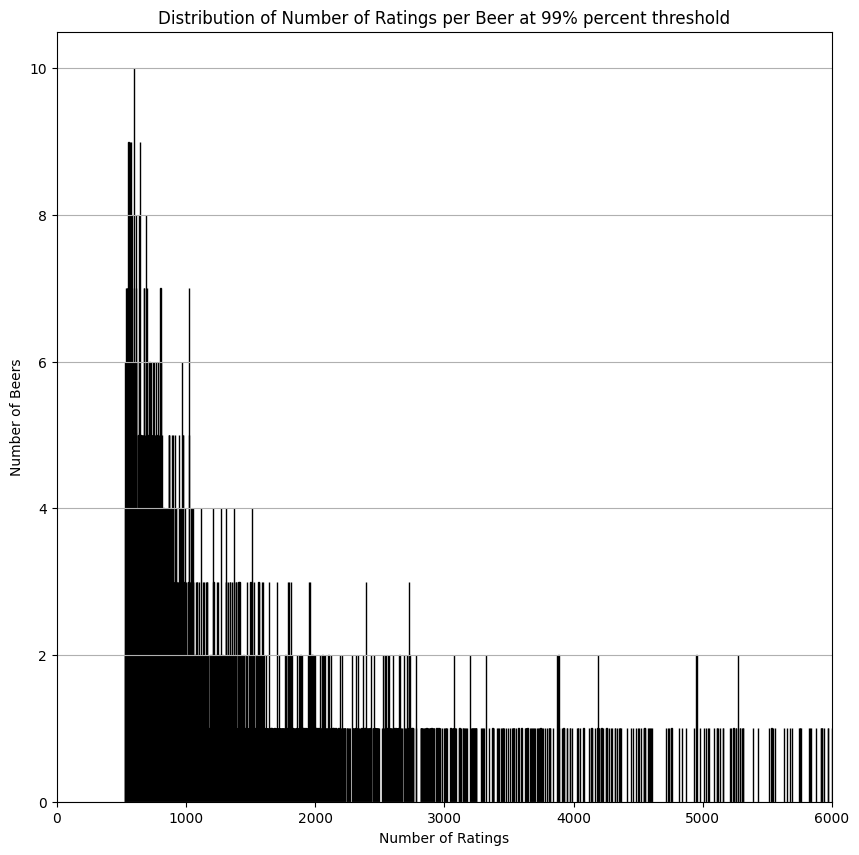

In [12]:
# Count the number of beers for each number of ratings
reviews_counts = df_filtered_beer['nbr_ratings'].value_counts().sort_index()

# Plot the distribution of number of ratings per beer
plt.figure(figsize=(10,10))
plt.bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Beers')
plt.title('Distribution of Number of Ratings per Beer at 99% percent threshold')
plt.grid(axis='y')
plt.xlim(0,6000)
plt.show()

In [13]:
df_filtered_beer['nbr_ratings'].describe(),

(count     2814.000000
 mean      1589.066098
 std       1635.915363
 min        529.000000
 25%        704.000000
 50%        998.000000
 75%       1762.500000
 max      16509.000000
 Name: nbr_ratings, dtype: float64,)

In [14]:
df_filtered_beer.loc[df_filtered_beer['nbr_ratings'].idxmin()]


beer_name                                      Jaipur IPA
brewery_id                                          13029
brewery_name                          Thornbridge Brewery
style                        English India Pale Ale (IPA)
nbr_ratings                                           529
nbr_reviews                                           198
avg                                                  4.01
ba_score                                             89.0
bros_score                                            NaN
abv                                                   5.9
avg_computed                                     4.003459
zscore                                                NaN
nbr_matched_valid_ratings                               0
avg_matched_valid_ratings                             NaN
Name: 27952, dtype: object

In [15]:
df_filtered_beer.loc[df_filtered_beer['nbr_ratings'].idxmax()]


beer_name                            Founders Breakfast Stout
brewery_id                                               1199
brewery_name                         Founders Brewing Company
style                        American Double / Imperial Stout
nbr_ratings                                             16509
nbr_reviews                                              3811
avg                                                      4.47
ba_score                                                 99.0
bros_score                                              100.0
abv                                                       8.3
avg_computed                                          4.51376
zscore                                                    NaN
nbr_matched_valid_ratings                                   0
avg_matched_valid_ratings                                 NaN
Name: 11757, dtype: object

Gives us an idea of the distribution of the most rated beers (nbr_ratings) and the maximum/minimum nbr_ratings of the top 1% most rated beer 

Next we explore the zscore per beer, the basic descriptive statistics, it's distribution and some visualization. Will allow us later, when we recompute the new z-scores with the most active reviewer to compare them. 

In [16]:
df_beer = df_beer[df_beer['zscore'] != 0].copy()
df_beer['zscore'].describe()
# If we compare these results with the one we would have got with the original DataFrame. 

count    40285.000000
mean        -0.408295
std          0.806491
min         -6.655704
25%         -0.785424
50%         -0.321596
75%          0.086733
max          2.211576
Name: zscore, dtype: float64

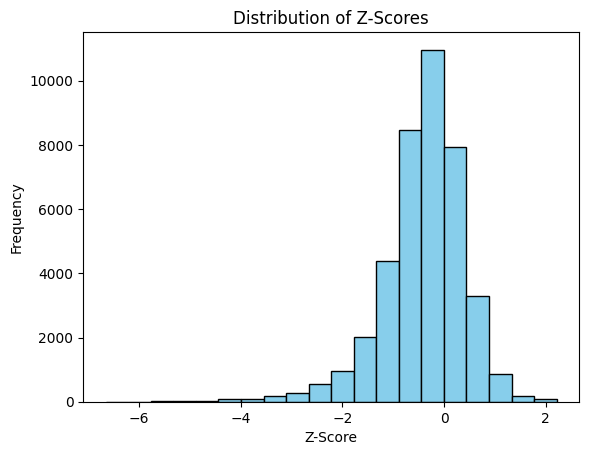

In [17]:
# Visualize the z-score distribution 

plt.hist(df_beer['zscore'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-Scores')
plt.show()

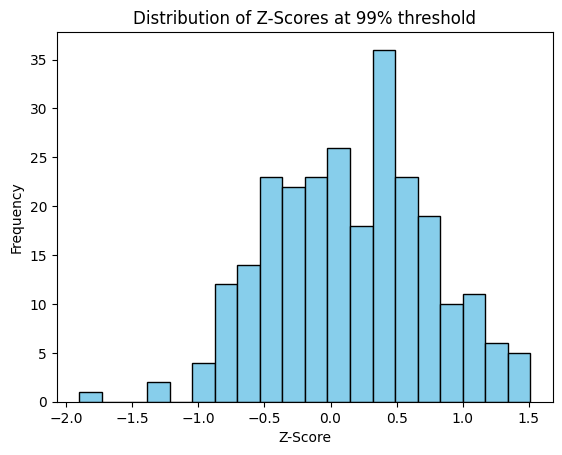

In [18]:
# Visualize the z-score distribution at 99% threshold 

plt.hist(df_filtered_beer['zscore'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-Scores at 99% threshold')
plt.show()

We can notice that for beers with nbr_ratings > 232 (the minimum number of ratings for the top 1% most rated beer) the z-score spreads less. 

In [19]:
# METTRE CES PLOTS DE COTES 

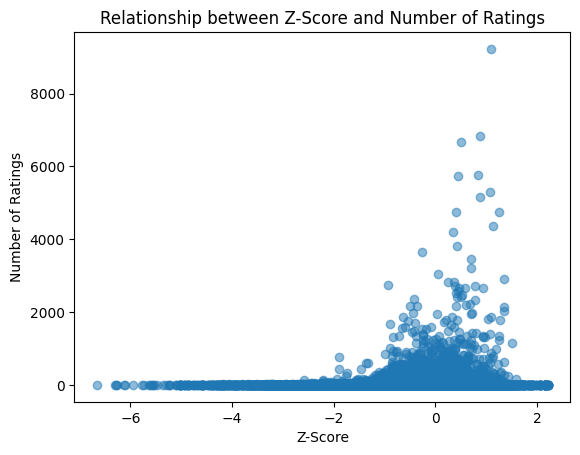

In [20]:
# Plot the z-score for each beer (blue point) in function of the number of ratings

plt.scatter(df_beer['zscore'], df_beer['nbr_ratings'], alpha=0.5)
plt.xlabel('Z-Score')
plt.ylabel('Number of Ratings')
plt.title('Relationship between Z-Score and Number of Ratings')
plt.show()

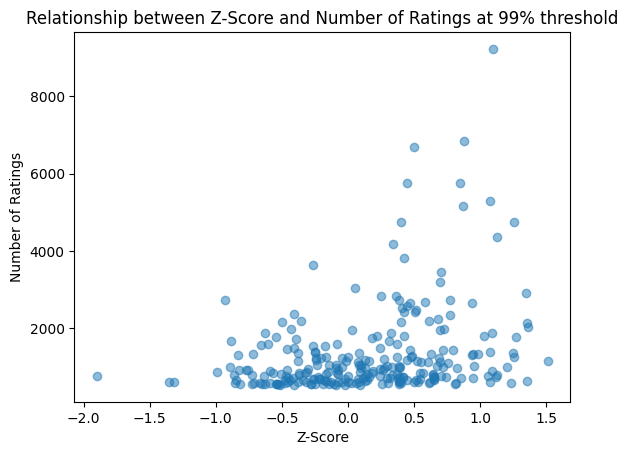

In [21]:
plt.scatter(df_filtered_beer['zscore'], df_filtered_beer['nbr_ratings'], alpha=0.5)
plt.xlabel('Z-Score')
plt.ylabel('Number of Ratings')
plt.title('Relationship between Z-Score and Number of Ratings at 99% threshold')
plt.show()

Here we explore the overall_score per beer, the basic descriptive statistics, it's distribution and some visualization. 

In [22]:
df_beer = df_beer[df_beer['overall_score'] != 0].copy()
print(df_beer['overall_score'].describe())

KeyError: 'overall_score'

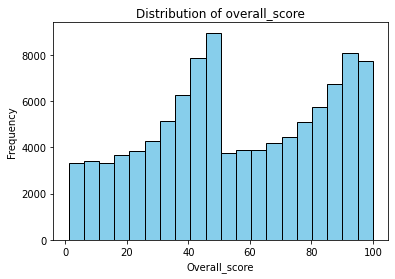

In [ ]:
# Visualize the overall_score distribution 

plt.hist(df_beer['overall_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Overall_score')
plt.ylabel('Frequency')
plt.title('Distribution of overall_score')
plt.show()

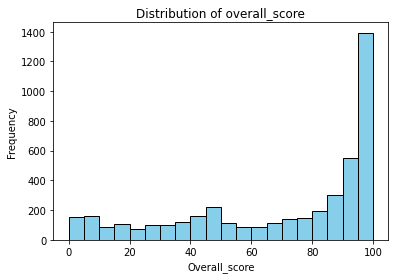

In [ ]:
# Visualize the overall_score distribution at 99% threshold 

plt.hist(df_filtered_beer['overall_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Overall_score')
plt.ylabel('Frequency')
plt.title('Distribution of overall_score')
plt.show()

Note: The frequency of beers with low overall_score gets lower when having more ratings (as the second plot shows only the top 1% most rated beers). Shows that when we restrain the number of users...

#### Data exploration on df_user

In [ ]:
df_users

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


First we explore the nbr_ratings per users, the basic descriptive statistics, it's distribution and some visualization. 

In [ ]:
df_users['nbr_ratings'].isna().sum()


0

In [ ]:
df_users['nbr_ratings'].describe()

count    70174.000000
mean       108.820945
std        754.493211
min          1.000000
25%          1.000000
50%          2.000000
75%         10.000000
max      46749.000000
Name: nbr_ratings, dtype: float64

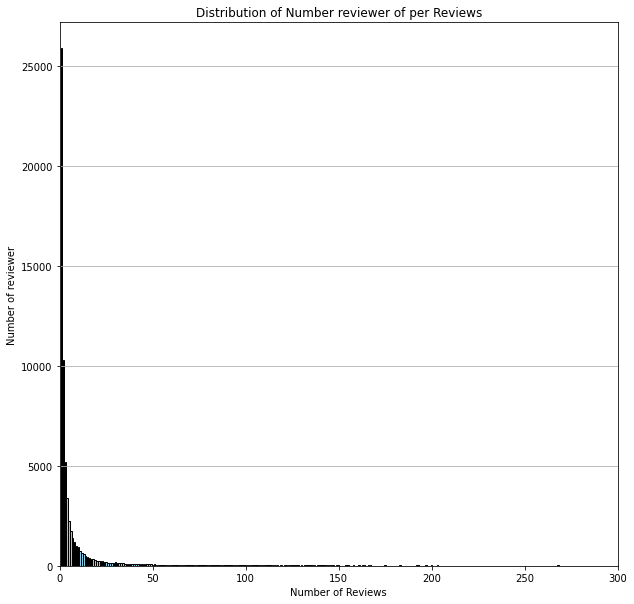

In [ ]:
# Count the number of beers for each number of ratings
reviews_counts = df_users['nbr_ratings'].value_counts().sort_index()

# Plot the distribution of number of ratings per beer
plt.figure(figsize=(10,10))
plt.bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of reviewer')
plt.title('Distribution of Number reviewer of per Reviews')
plt.grid(axis='y')
plt.xlim(0,300)
plt.show()

In [ ]:
# Count the number of beers for each number of reviews
reviews_counts = df_users['nbr_ratings'].value_counts().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: Original axis
axes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Number of reviewer')
axes[0].set_title('Distribution of Number reviewer of per Reviews')
axes[0].grid(axis='y')

# Plot 2: Inverted axis
axes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of reviewer')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_title('Distribution of Number of Reviews per reviewer (Inverted Axis)')
axes[1].grid(axis='x')


axes[1].set_ylim(0, 300) 
axes[0].set_xlim(0, 200) 

plt.tight_layout()  
plt.show()


"\n# Count the number of beers for each number of reviews\nreviews_counts = df_users['nbr_ratings'].value_counts().sort_index()\n\n# Create a figure with two subplots\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))\n\n# Plot 1: Original axis\naxes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')\naxes[0].set_xlabel('Number of Reviews')\naxes[0].set_ylabel('Number of reviewer')\naxes[0].set_title('Distribution of Number reviewer of per Reviews')\naxes[0].grid(axis='y')\n\n# Plot 2: Inverted axis\naxes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')\naxes[1].set_xlabel('Number of reviewer')\naxes[1].set_ylabel('Number of Reviews')\naxes[1].set_title('Distribution of Number of Reviews per reviewer (Inverted Axis)')\naxes[1].grid(axis='x')\n\n\naxes[1].set_ylim(0, 300) \naxes[0].set_xlim(0, 200) \n\nplt.tight_layout()  \nplt.show()\n"

In [ ]:
# Choose a percentile threshold (adjust as needed)
ratings_threshold75 = df_users['nbr_ratings'].quantile(0.75)
ratings_threshold90 = df_users['nbr_ratings'].quantile(0.90)
ratings_threshold95 = df_users['nbr_ratings'].quantile(0.95)
ratings_threshold98 = df_users['nbr_ratings'].quantile(0.98)
ratings_threshold99 = df_users['nbr_ratings'].quantile(0.99)

# Filter beers based on the threshold
filtered_users75 = df_users[df_users['nbr_ratings'] >= ratings_threshold75]
filtered_users90 = df_users[df_users['nbr_ratings'] >= ratings_threshold90]
filtered_users95 = df_users[df_users['nbr_ratings'] >= ratings_threshold95]
filtered_users98 = df_users[df_users['nbr_ratings'] >= ratings_threshold98]
filtered_users99 = df_users[df_users['nbr_ratings'] >= ratings_threshold99]

print(filtered_users75.shape,
filtered_users90.shape,
filtered_users95.shape,
filtered_users98.shape,
filtered_users99.shape)

(17744, 5) (7037, 5) (3518, 5) (1404, 5) (702, 5)


We have 702 at the top 1% of nbr_ratings. 

In [ ]:
# Create a new DataFrame with beers in the 99th percentile
df_filtered_users = filtered_users99

# Display the new DataFrame
display(df_filtered_users)

,nbr_ratings,user_id,user_name,joined,location
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
5,21024,227834,Beerhunter111,1.352718e+09,Germany
6,8781,83106,Erzengel,1.224324e+09,Germany
7,4051,37316,Lowenbrau,1.147860e+09,Spain
...,...,...,...,...,...
8992,3038,114741,Reynolds314,1.286359e+09,"United States, Connecticut"
10064,2652,68527,baraciisch,1.201432e+09,"United States, California"
10567,5031,78749,BoBoChamp,1.216462e+09,Belgium
10772,2543,44516,islay,1.162552e+09,"United States, Minnesota"


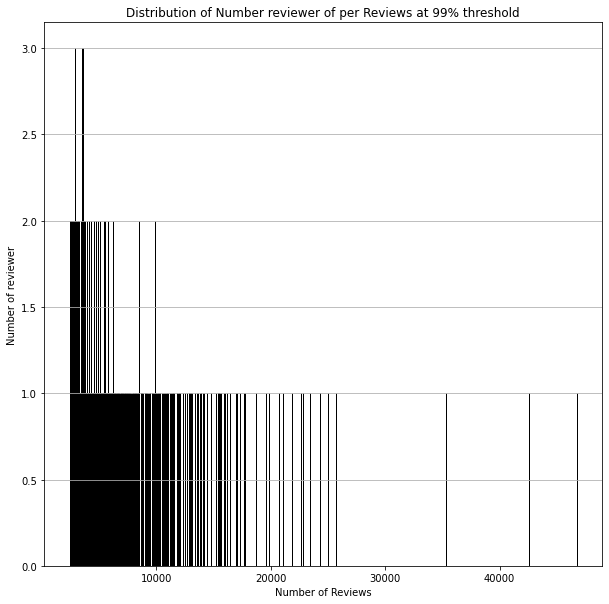

In [ ]:
# Count the number of beers for each number of ratings
reviews_counts = df_filtered_users['nbr_ratings'].value_counts().sort_index()

# Plot the distribution of number of ratings per beer
plt.figure(figsize=(10,10))
plt.bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of reviewer')
plt.title('Distribution of Number reviewer of per Reviews at 99% threshold')
plt.grid(axis='y')
plt.show()

In [ ]:
df_filtered_users.loc[df_filtered_users['nbr_ratings'].idxmin()]


nbr_ratings                       2406
user_id                         221043
user_name                     DCLawyer
joined                    1349431200.0
location       United States, Virginia
Name: 1754, dtype: object

In [ ]:
df_filtered_users.loc[df_filtered_users['nbr_ratings'].idxmax()]

nbr_ratings           46749
user_id               38926
user_name           fonefan
joined         1150970400.0
location            Denmark
Name: 16, dtype: object

In [ ]:
# Count the number of beers for each number of reviews
reviews_counts = df_filtered_users['nbr_ratings'].value_counts().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: Original axis
axes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Number of reviewer')
axes[0].set_title('Distribution of Number reviewer of per Reviews at 99% threshold')
axes[0].grid(axis='y')

# Plot 2: Inverted axis
axes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of reviewer')
axes[1].set_ylabel('Number of Reviews')
axes[1].set_title('Distribution of Number of Reviews per reviewer at 99% threshold (Inverted Axis)')
axes[1].grid(axis='x')


plt.tight_layout()  
plt.show()

"\n# Count the number of beers for each number of reviews\nreviews_counts = df_filtered_users['nbr_ratings'].value_counts().sort_index()\n\n# Create a figure with two subplots\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))\n\n# Plot 1: Original axis\naxes[0].bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')\naxes[0].set_xlabel('Number of Reviews')\naxes[0].set_ylabel('Number of reviewer')\naxes[0].set_title('Distribution of Number reviewer of per Reviews at 99% threshold')\naxes[0].grid(axis='y')\n\n# Plot 2: Inverted axis\naxes[1].barh(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')\naxes[1].set_xlabel('Number of reviewer')\naxes[1].set_ylabel('Number of Reviews')\naxes[1].set_title('Distribution of Number of Reviews per reviewer at 99% threshold (Inverted Axis)')\naxes[1].grid(axis='x')\n\n\nplt.tight_layout()  \nplt.show()\n"

Next, we explore the location, the basic descriptive statistics, it's distribution and some visualization. 

In [ ]:
# Raw data
print(df_users['location'].value_counts().sort_values(ascending=False))
# Threshold at top 1% users
print(df_filtered_users['location'].value_counts().sort_values(ascending=False))


location
Canada                         3255
United States, California      2804
England                        2734
Poland                         1701
United States, Pennsylvania    1632
                               ... 
Jamaica                           1
North Korea                       1
Nagorno-Karabakh                  1
French Guiana                     1
Tibet                             1
Name: count, Length: 222, dtype: int64
location
Canada                          54
Denmark                         51
England                         48
Sweden                          36
Netherlands                     33
                                ..
United States, West Virginia     1
Moldova                          1
United States, Delaware          1
Czech Republic                   1
United States, Maine             1
Name: count, Length: 78, dtype: int64


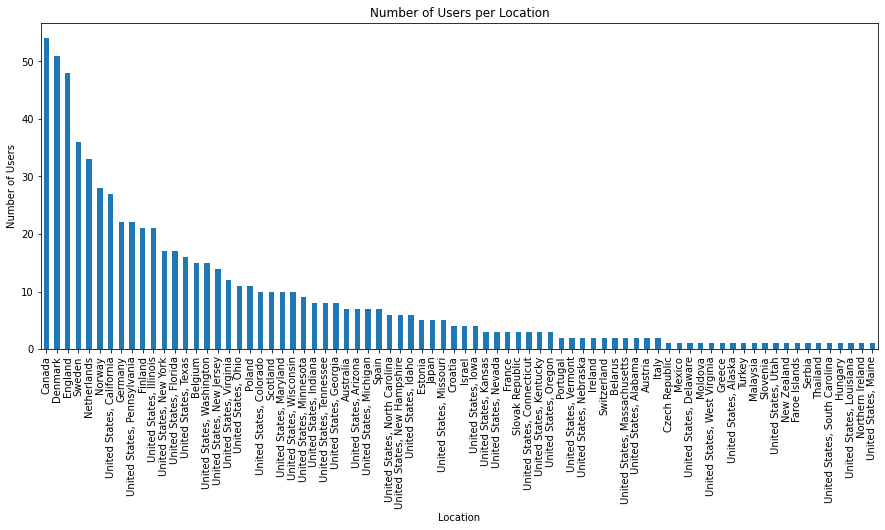

In [ ]:
# plot the number of users per location att 99% threshold

df_filtered_users['location'].value_counts().plot(kind='bar', figsize=(15,6))
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.title('Number of Users per Location')
plt.show()


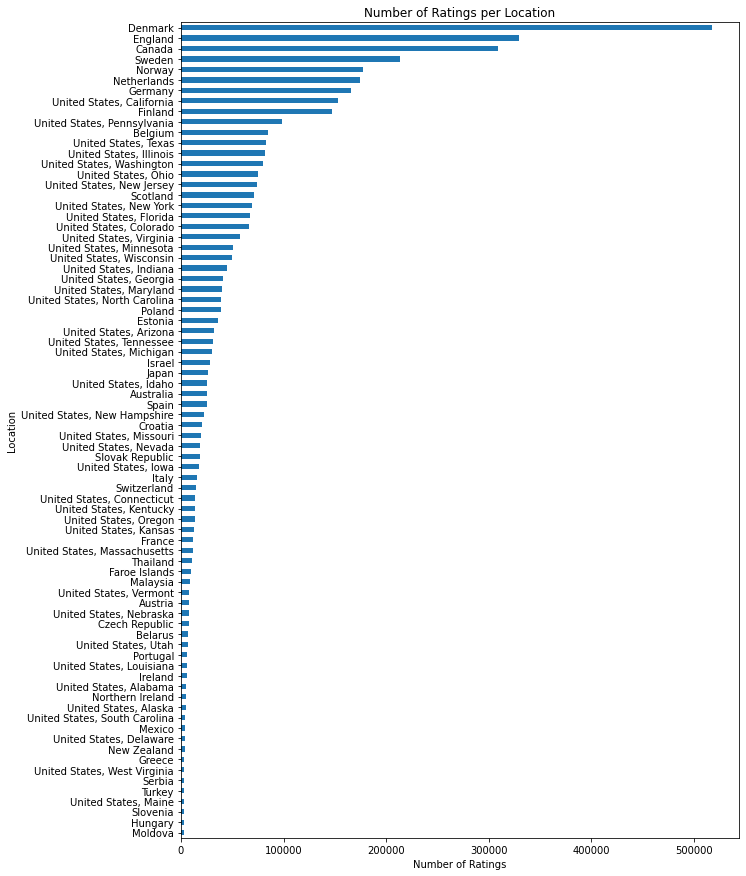

In [ ]:
# plot the number of ratings per location att 99% threshold 

df_filtered_users.groupby('location')['nbr_ratings'].sum().sort_values().plot(kind='barh', figsize=(10, 15))
plt.xlabel('Number of Ratings')
plt.ylabel('Location')
plt.title('Number of Ratings per Location')
plt.show()

### BeerAdvocate website

In [ ]:
df_beer_BA = pd.read_csv("BeerAdvocate/beers.csv", index_col='beer_id')
df_breweries_BA  = pd.read_csv("BeerAdvocate/breweries.csv")
df_users_BA = pd.read_csv("BEerAdvocate/users.csv")

In [ ]:
df_beer_BA

,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
beer_id,,,,,,,,,,,,,,
166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN
19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN
19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
df_users_BA

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,1.291115e+09,"United States, California"
153700,1,1,justin0001.352175,Justin0001,1.248343e+09,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,1.430561e+09,NaN
153702,1,1,joetex.800347,JoeTex,1.400234e+09,"United States, California"


#### Data exploration on df_beer_BA

In [ ]:
# keep in mind that we also have bros_score, so potentialy we could use it to filter the data and only keep the users which are not bros.
# so the same with the bros (try to look where they are compared to the others)

In [ ]:
df_beer_BA['nbr_ratings'].describe()

count    280823.000000
mean         29.887267
std         231.010063
min           0.000000
25%           1.000000
50%           2.000000
75%           8.000000
max       16509.000000
Name: nbr_ratings, dtype: float64

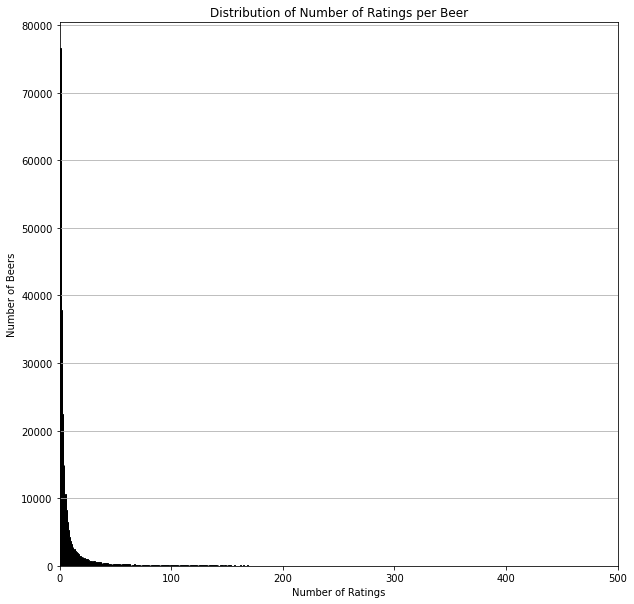

In [ ]:
# Count the number of beers for each number of ratings
reviews_counts = df_beer_BA['nbr_ratings'].value_counts().sort_index()

# Plot the distribution of number of ratings per beer
plt.figure(figsize=(10,10))
plt.bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Beers')
plt.title('Distribution of Number of Ratings per Beer')
plt.grid(axis='y')
plt.xlim(0, 500)
plt.show()

In [ ]:
# Get an idea of the distribution of the number of ratings per beer

# Choose different quantile thresholds 
ratings_threshold75_BA = df_beer_BA['nbr_ratings'].quantile(0.75)
ratings_threshold90_BA = df_beer_BA['nbr_ratings'].quantile(0.90)
ratings_threshold95_BA = df_beer_BA['nbr_ratings'].quantile(0.95)
ratings_threshold98_BA = df_beer_BA['nbr_ratings'].quantile(0.98)
ratings_threshold99_BA = df_beer_BA['nbr_ratings'].quantile(0.99)

# Filter beers based on the threshold
filtered_beers75_BA = df_beer_BA[df_beer_BA['nbr_ratings'] >= ratings_threshold75_BA]
filtered_beers90_BA = df_beer_BA[df_beer_BA['nbr_ratings'] >= ratings_threshold90_BA]
filtered_beers95_BA = df_beer_BA[df_beer_BA['nbr_ratings'] >= ratings_threshold95_BA]
filtered_beers98_BA = df_beer_BA[df_beer_BA['nbr_ratings'] >= ratings_threshold98_BA]
filtered_beers99_BA = df_beer_BA[df_beer_BA['nbr_ratings'] >= ratings_threshold99_BA]

print(filtered_beers75_BA.shape,
filtered_beers90_BA.shape,
filtered_beers95_BA.shape,
filtered_beers98_BA.shape,
filtered_beers99_BA.shape)

(70860, 14) (28177, 14) (14086, 14) (5631, 14) (2814, 14)


Note: we see that even by taking the top 1% of most rated beers we still have 2814 beers. If we compare this results to the one found in RateBeer, we have 63.55% of the nbr_ratings for the top 1% rated beer.

In [ ]:
# Create a new DataFrame with beers in the 99th percentile
df_filtered_beer_BA = filtered_beers99_BA

# Display the new DataFrame
display(df_filtered_beer_BA)

,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
beer_id,,,,,,,,,,,,,,
41037,Ola Dubh Special Reserve 12,323,Harviestoun Brewery Ltd.,Old Ale,834,383,4.13,92.0,NaN,8.0,4.114868,NaN,0,NaN
41012,Ola Dubh Special Reserve 16,323,Harviestoun Brewery Ltd.,Old Ale,628,297,4.12,91.0,NaN,8.0,4.126433,NaN,0,NaN
875,Old Engine Oil Black Ale,323,Harviestoun Brewery Ltd.,English Porter,1736,812,4.10,91.0,100.0,6.0,4.135737,NaN,0,NaN
12719,Innis And Gunn Original Oak Aged Beer,10272,Innis & Gunn,Scottish Ale,1775,571,3.75,85.0,81.0,6.6,3.740062,NaN,0,NaN
77595,Irish Whiskey Aged Scottish Stout,10272,Innis & Gunn,English Stout,672,177,3.81,86.0,NaN,7.4,3.818557,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57088,Fluffy White Rabbits,18371,Pretty Things Beer & Ale Project,Tripel,630,187,4.03,90.0,NaN,8.5,4.019238,NaN,0,NaN
46290,Jack D'Or,18371,Pretty Things Beer & Ale Project,Saison / Farmhouse Ale,1640,642,4.01,90.0,96.0,6.5,4.036098,NaN,0,NaN
82753,Meadowlark IPA,18371,Pretty Things Beer & Ale Project,American IPA,792,133,4.10,91.0,NaN,7.0,4.076174,NaN,0,NaN


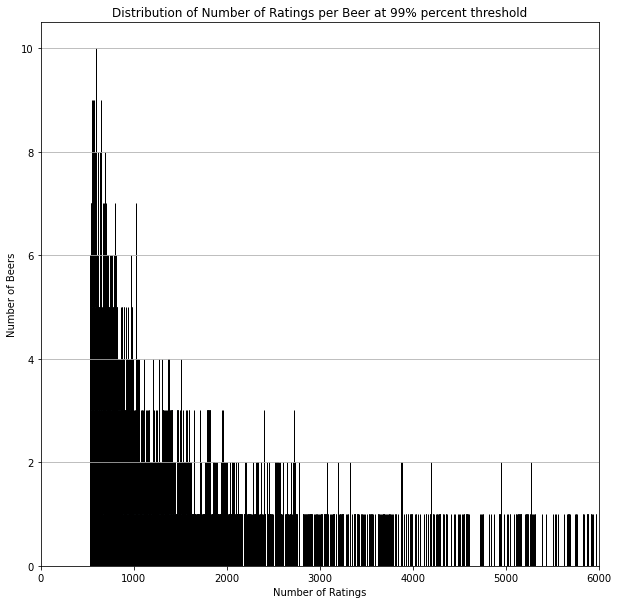

In [ ]:
# Count the number of beers for each number of ratings
reviews_counts = df_filtered_beer_BA['nbr_ratings'].value_counts().sort_index()

# Plot the distribution of number of ratings per beer
plt.figure(figsize=(10,10))
plt.bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Beers')
plt.title('Distribution of Number of Ratings per Beer at 99% percent threshold')
plt.grid(axis='y')
plt.xlim(0,6000)
plt.show()

In [ ]:
print(df_filtered_beer_BA.loc[df_filtered_beer_BA['nbr_ratings'].idxmax()]
,df_filtered_beer_BA.loc[df_filtered_beer_BA['nbr_ratings'].idxmin()])

beer_name                            Founders Breakfast Stout
brewery_id                                               1199
brewery_name                         Founders Brewing Company
style                        American Double / Imperial Stout
nbr_ratings                                             16509
nbr_reviews                                              3811
avg                                                      4.47
ba_score                                                 99.0
bros_score                                              100.0
abv                                                       8.3
avg_computed                                          4.51376
zscore                                                    NaN
nbr_matched_valid_ratings                                   0
avg_matched_valid_ratings                                 NaN
Name: 11757, dtype: object beer_name                                      Jaipur IPA
brewery_id                                     

Gives us an idea of the distribution of the most rated beers (nbr_ratings) and the maximum/minimum nbr_ratings of the top 1% most rated beer. Despite having less beer in the top 1% than in RateBeer they have more ratings (minimum 529 here vs 232 in RateBeer). 

Next we explore the zscore per beer, the basic descriptive statistics, it's distribution and some visualization. Will allow us later, when we recompute the new z-scores with the most active reviewer to compare them. 

In [ ]:
df_beer_BA = df_beer_BA[df_beer_BA['zscore'] != 0].copy()
df_beer_BA['zscore'].describe()

count    40285.000000
mean        -0.408295
std          0.806491
min         -6.655704
25%         -0.785424
50%         -0.321596
75%          0.086733
max          2.211576
Name: zscore, dtype: float64

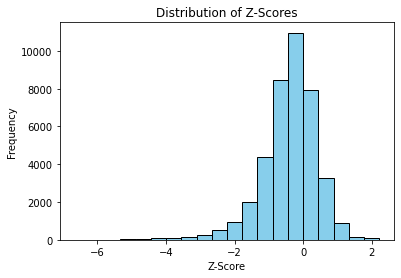

In [ ]:
# Visualize the z-score distribution 

plt.hist(df_beer_BA['zscore'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-Scores')
plt.show()

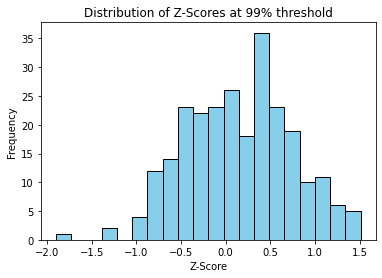

In [ ]:
# Visualize the z-score distribution at 99% threshold 

plt.hist(df_filtered_beer_BA['zscore'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-Scores at 99% threshold')
plt.show()

We can notice that for beers with nbr_ratings > 529 (the minimum number of ratings for the top 1% most rated beer) the z-score spreads less (and more than for RateBeer as we have more nbr_ratings per beer). 

Here we explore the overall_score per beer, the basic descriptive statistics, it's distribution and some visualization. 

In [ ]:
df_beer_BA = df_beer_BA[df_beer_BA['ba_score'] != 0].copy()
print(df_beer_BA['ba_score'].describe())

count    61200.000000
mean        84.633284
std          4.052723
min         46.000000
25%         83.000000
50%         85.000000
75%         86.000000
max        100.000000
Name: ba_score, dtype: float64


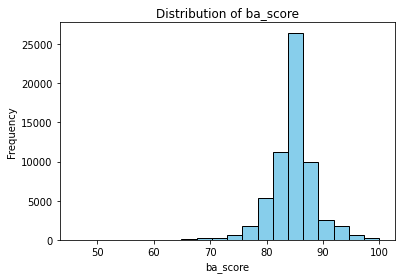

In [ ]:
# Visualize the z-score distribution 

plt.hist(df_beer_BA['ba_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('ba_score')
plt.ylabel('Frequency')
plt.title('Distribution of ba_score')
plt.show()

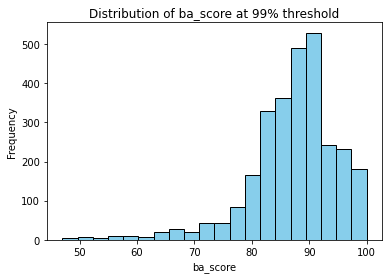

In [ ]:
# Visualize the z-score distribution at 99% threshold 

plt.hist(df_filtered_beer_BA['ba_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('ba_score')
plt.ylabel('Frequency')
plt.title('Distribution of ba_score at 99% threshold')
plt.show()

Note: The mean ba_score of beers shifts to the right when having more ratings (as the second plot shows only the top 1% most rated beers). Shows that when we restrain the number of users...

### Data exploration on df_user_BA

In [ ]:
df_users_BA['nbr_ratings'].describe()


count    153704.000000
mean         54.605163
std         252.388790
min           1.000000
25%           1.000000
50%           3.000000
75%          16.000000
max       12046.000000
Name: nbr_ratings, dtype: float64

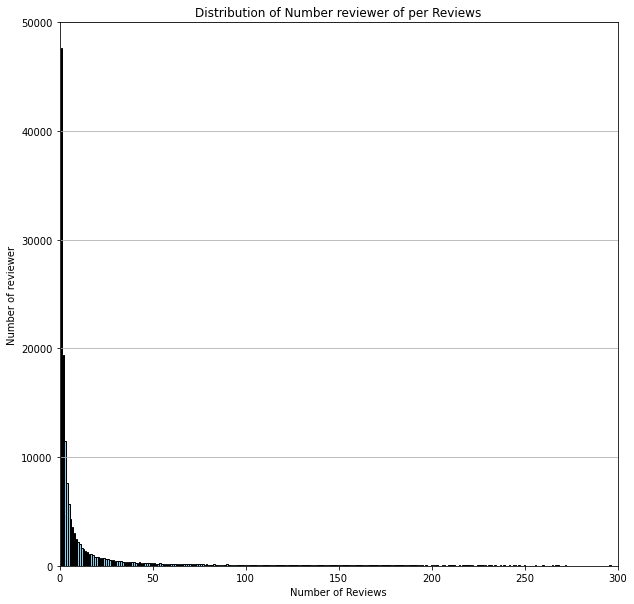

In [ ]:
# Count the number of beers for each number of ratings
reviews_counts = df_users_BA['nbr_ratings'].value_counts().sort_index()

# Plot the distribution of number of ratings per beer
plt.figure(figsize=(10,10))
plt.bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of reviewer')
plt.title('Distribution of Number reviewer of per Reviews')
plt.grid(axis='y')
plt.xlim(0,300)
plt.show()

In [ ]:
# Get an idea of the distribution of the number of ratings per beer

# Choose different quantile thresholds 
ratings_threshold75_BA = df_users_BA['nbr_ratings'].quantile(0.75)
ratings_threshold90_BA = df_users_BA['nbr_ratings'].quantile(0.90)
ratings_threshold95_BA = df_users_BA['nbr_ratings'].quantile(0.95)
ratings_threshold98_BA = df_users_BA['nbr_ratings'].quantile(0.98)
ratings_threshold99_BA = df_users_BA['nbr_ratings'].quantile(0.99)

# Filter beers based on the threshold
filtered_users75_BA = df_users_BA[df_users_BA['nbr_ratings'] >= ratings_threshold75_BA]
filtered_users90_BA = df_users_BA[df_users_BA['nbr_ratings'] >= ratings_threshold90_BA]
filtered_users95_BA = df_users_BA[df_users_BA['nbr_ratings'] >= ratings_threshold95_BA]
filtered_users98_BA = df_users_BA[df_users_BA['nbr_ratings'] >= ratings_threshold98_BA]
filtered_users99_BA = df_users_BA[df_users_BA['nbr_ratings'] >= ratings_threshold99_BA]

print(filtered_beers75_BA.shape,
filtered_users90_BA.shape,
filtered_users95_BA.shape,
filtered_users98_BA.shape,
filtered_users99_BA.shape)

(70860, 14) (15415, 6) (7708, 6) (3075, 6) (1542, 6)


We have 1542 users at the top 1% of nbr_ratings. 

In [ ]:
# Create a new DataFrame with beers in the 99th percentile
df_filtered_users_BA = filtered_users99_BA

# Display the new DataFrame
display(df_filtered_users_BA)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
5,2326,0,hellpop65.48993,Hellpop65,1.131966e+09,"United States, Kansas"
6,3098,0,latarnik.52897,Latarnik,1.133521e+09,"United States, New Jersey"
...,...,...,...,...,...,...
30610,1331,0,italianstallion.788089,italianstallion,1.394622e+09,"United States, Wisconsin"
32690,1261,1017,ri0.683063,Ri0,1.341137e+09,"United States, Wisconsin"
32760,1219,5,xdtfx.691499,xdtfx,1.346062e+09,"United States, Illinois"
40813,1039,542,mikeward.620428,MikeWard,1.315994e+09,"United States, Pennsylvania"


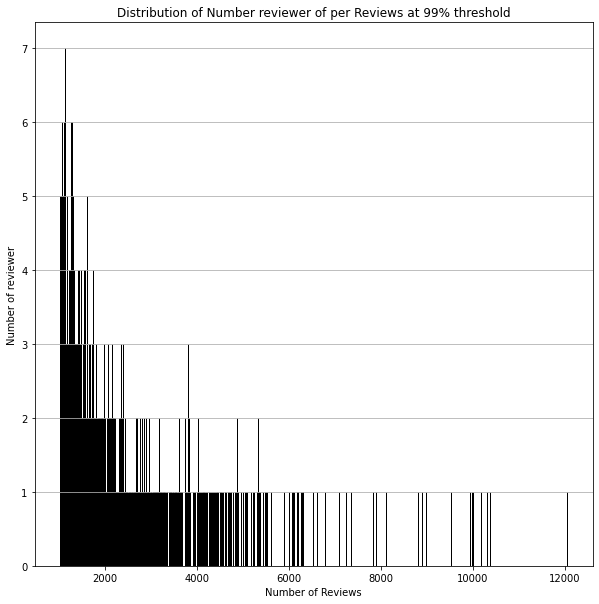

In [ ]:
# Count the number of beers for each number of ratings
reviews_counts = df_filtered_users_BA['nbr_ratings'].value_counts().sort_index()

# Plot the distribution of number of ratings per beer
plt.figure(figsize=(10,10))
plt.bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of reviewer')
plt.title('Distribution of Number reviewer of per Reviews at 99% threshold')
plt.grid(axis='y')
plt.show()

In [ ]:
df_filtered_users_BA.loc[df_filtered_users_BA['nbr_ratings'].idxmax()]

nbr_ratings           12046
nbr_reviews            7593
user_id          sammy.3853
user_name             Sammy
joined         1070276400.0
location             Canada
Name: 228, dtype: object

In [ ]:
df_filtered_users_BA.loc[df_filtered_users_BA['nbr_ratings'].idxmin()]

nbr_ratings                       1023
nbr_reviews                         71
user_id             stampfler07.154141
user_name                  stampfler07
joined                    1187604000.0
location       United States, Colorado
Name: 586, dtype: object

In [ ]:
# On peut aussi faire sur les locations mais flemme et surtout y'as pas d'interet pour ce tour du monde. 

#### MatchedBeer data

Here we show that we can not work with the Matched_beer data frames as they only take into account the users with ratings of BeerAdvocate and RateBeer, thus we ommit a significative part of the most active users in each site. 

In [ ]:
pd.set_option('display.max_columns', None)
df_users_matched = pd.read_csv("matched_beer_data/users.csv", header=1)
df_users_matched

,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined.1,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1
0,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel
1,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138
2,1.207303e+09,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1.150798e+09,"United States, Washington",7452,38859,nimbleprop,nimbleprop
3,1.322737e+09,Estonia,11,0,visionthing.639993,visionthing,visionthing,1.242986e+09,Estonia,5462,91324,visionthing,visionthing
4,1.432116e+09,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1.431166e+09,England,1096,368991,LazyPyro,lazypyro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,1.253182e+09,"United States, Pennsylvania",398,398,shadesofgray.371155,ShadesOfGray,shadesofgray,1.261998e+09,"United States, Pennsylvania",1,99346,ShadesOfGray,shadesofgray
3016,1.095847e+09,"United States, Michigan",587,587,ypsifly.8833,ypsifly,ypsifly,1.139569e+09,"United States, Michigan",1,33393,ypsifly,ypsifly
3017,1.047121e+09,"United States, Texas",1379,1379,hardtarget.1712,HardTarget,hardtarget,1.095934e+09,"United States, Texas",1,15553,HardTarget,hardtarget
3018,1.416740e+09,Vietnam,176,24,nelsonsaigon.897449,nelsonsaigon,nelsonsaigon,1.406369e+09,Vietnam,1,327965,nelsonsaigon,nelsonsaigon


In [ ]:
# Only taking the part of the data frame which comes from RateBeer 
df_users_matched = df_users_matched.loc[:, 'location.1':'user_name_lower.1']
df_users_matched

,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1
0,Germany,8781,83106,Erzengel,erzengel
1,"United States, Virginia",6240,290599,GenDV138,gendv138
2,"United States, Washington",7452,38859,nimbleprop,nimbleprop
3,Estonia,5462,91324,visionthing,visionthing
4,England,1096,368991,LazyPyro,lazypyro
...,...,...,...,...,...
3015,"United States, Pennsylvania",1,99346,ShadesOfGray,shadesofgray
3016,"United States, Michigan",1,33393,ypsifly,ypsifly
3017,"United States, Texas",1,15553,HardTarget,hardtarget
3018,Vietnam,1,327965,nelsonsaigon,nelsonsaigon


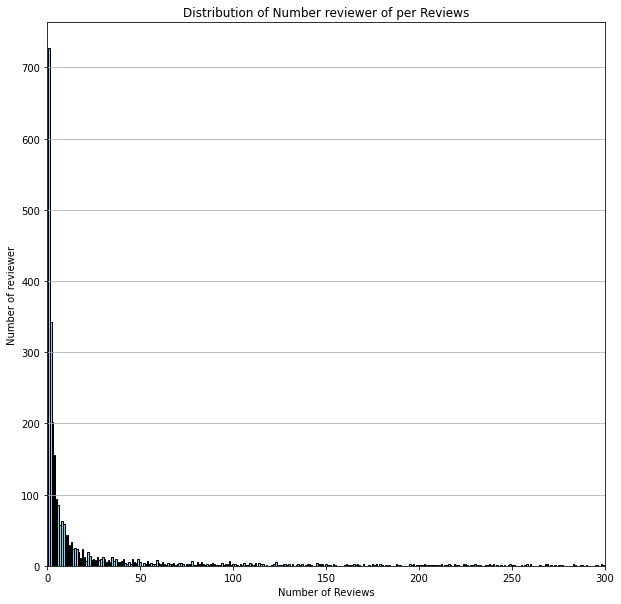

In [ ]:
# Count the number of beers for each number of ratings
reviews_counts = df_users_matched['nbr_ratings.1'].value_counts().sort_index()

# Plot the distribution of number of ratings per beer
plt.figure(figsize=(10,10))
plt.bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of reviewer')
plt.title('Distribution of Number reviewer of per Reviews')
plt.grid(axis='y')
plt.xlim(0,300)
plt.show()

In [ ]:
ratings_threshold99_matched = df_users_matched['nbr_ratings.1'].quantile(0.99)
filtered_users99_matched = df_users_matched[df_users_matched['nbr_ratings.1'] >= ratings_threshold99_matched]

filtered_users99_matched.shape

(31, 5)

We have 31 users at the top 1% of nbr_ratings. 

In [ ]:
filtered_users99_matched

,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1
0,Germany,8781,83106,Erzengel,erzengel
1,"United States, Virginia",6240,290599,GenDV138,gendv138
2,"United States, Washington",7452,38859,nimbleprop,nimbleprop
5,Finland,6403,98624,tiong,tiong
6,Finland,11275,82173,rosenbergh,rosenbergh
8,Germany,20678,17095,Koelschtrinker,koelschtrinker
9,England,19568,74136,Leighton,leighton
11,Netherlands,13082,111648,kermis,kermis
13,Switzerland,11810,181,Bov,bov
15,"United States, Michigan",7835,87165,arminjewell,arminjewell


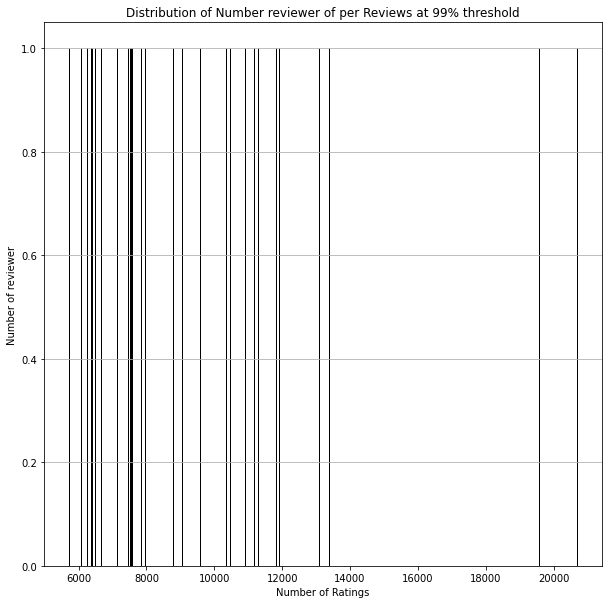

In [ ]:
# Count the number of beers for each number of ratings
reviews_counts = filtered_users99_matched['nbr_ratings.1'].value_counts().sort_index()

# Plot the distribution of number of ratings per beer
plt.figure(figsize=(10,10))
plt.bar(reviews_counts.index, reviews_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of reviewer')
plt.title('Distribution of Number reviewer of per Reviews at 99% threshold')
plt.grid(axis='y')
plt.show()

In [ ]:
filtered_users99_matched.loc[filtered_users99_matched['nbr_ratings.1'].idxmax()]

location.1                  Germany
nbr_ratings.1                 20678
user_id.1                     17095
user_name.1          Koelschtrinker
user_name_lower.1    koelschtrinker
Name: 8, dtype: object

In [ ]:
filtered_users99_matched.loc[filtered_users99_matched['nbr_ratings.1'].idxmin()]

location.1           Netherlands
nbr_ratings.1               5733
user_id.1                 285335
user_name.1               Maakun
user_name_lower.1         maakun
Name: 67, dtype: object

on peut aussi regarder ou se trouve ce user dans RateBeer user pour voir environ ou il est ou meme regarder ou ces 31
users se trouvent dans RateBeer (meme chose pour BeerAdvocate). C'est les memes users qui commentes les deux donc juste utiliser la 
data frame au dessus (la filtered user) et faire avec ca tema la proportion et si les plus actifs sont compris dedans. 

In [ ]:
print(df_filtered_users[df_filtered_users['user_id'] == 17095])


     nbr_ratings  user_id       user_name        joined location
101        20678    17095  Koelschtrinker  1.100257e+09  Germany


In [ ]:
df_filtered_users_ranked = df_filtered_users.sort_values('nbr_ratings', ascending=False)
df_filtered_users_ranked

,nbr_ratings,user_id,user_name,joined,location
16,46749,38926,fonefan,1.150970e+09,Denmark
54,42567,30149,yespr,1.132398e+09,Denmark
161,35316,5328,Ungstrup,1.028714e+09,Denmark
140,25701,14280,joergen,1.091786e+09,Denmark
27,24966,19328,oh6gdx,1.106737e+09,Finland
...,...,...,...,...,...
200,2409,266560,vinivini,1.372586e+09,Belarus
2107,2409,91686,DeanF,1.243850e+09,Canada
848,2407,3847,jazz88,1.016968e+09,"United States, California"
3441,2407,203936,Cool_Bond,1.342087e+09,Sweden


In [ ]:
rank = df_filtered_users_ranked[df_filtered_users_ranked['user_id'] == 17095].index[0] + 1
print("Rank of user with user_id 17095:", rank)


Rank of user with user_id 17095: 102
